In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv
/kaggle/working/__notebook__.ipynb


# **Section 0: Preamble**
**ReadMe:**
This notebook is work in progress by a amateur python enthusiast and currently contains the following sections:
1. Data clean-up 
2. Understanding Melbourne urban set-up by a non-Aussie
3. Can I understand the data better with charts?
4. Regression for prediction

# **Section 1: Data clean-up**

In [2]:
# Read in the input data file
df_raw = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')
print("The dataset has {} rows and {} columns with a total size of {} entries\n".format(len(df_raw.index),len(df_raw.columns),df_raw.size))
for col in df_raw.columns:
    print("There are {} unique values in {}".format(len(df_raw[col].unique()),col))

The dataset has 13580 rows and 21 columns with a total size of 285180 entries

There are 314 unique values in Suburb
There are 13378 unique values in Address
There are 9 unique values in Rooms
There are 3 unique values in Type
There are 2204 unique values in Price
There are 5 unique values in Method
There are 268 unique values in SellerG
There are 58 unique values in Date
There are 202 unique values in Distance
There are 198 unique values in Postcode
There are 12 unique values in Bedroom2
There are 9 unique values in Bathroom
There are 12 unique values in Car
There are 1448 unique values in Landsize
There are 603 unique values in BuildingArea
There are 145 unique values in YearBuilt
There are 34 unique values in CouncilArea
There are 6503 unique values in Lattitude
There are 7063 unique values in Longtitude
There are 8 unique values in Regionname
There are 311 unique values in Propertycount


In [3]:
df_raw.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,...,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,...,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,...,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,...,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,...,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# Clean up NaNs
df = df_raw.copy()
df['Car'].fillna(0,inplace=True)
df.Car = df.Car.astype(int)
df['Bedroom2'].fillna(0,inplace=True)
df.Bedroom2 = df.Bedroom2.astype(int)
df['Bathroom'].fillna(0,inplace=True)
df.Bathroom = df.Bathroom.astype(int)
df['Postcode'].fillna('',inplace=True)
df.Postcode = df.Postcode.astype('category')

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].fillna('Unknown',inplace=True)

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = df[col].astype('category')
    
# # change postcode type to int
# # df.describe(include='all')

# df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         13580 non-null  category
 1   Address        13580 non-null  category
 2   Rooms          13580 non-null  int64   
 3   Type           13580 non-null  category
 4   Price          13580 non-null  float64 
 5   Method         13580 non-null  category
 6   SellerG        13580 non-null  category
 7   Date           13580 non-null  category
 8   Distance       13580 non-null  float64 
 9   Postcode       13580 non-null  category
 10  Bedroom2       13580 non-null  int64   
 11  Bathroom       13580 non-null  int64   
 12  Car            13580 non-null  int64   
 13  Landsize       13580 non-null  float64 
 14  BuildingArea   7130 non-null   float64 
 15  YearBuilt      8205 non-null   float64 
 16  CouncilArea    13580 non-null  category
 17  Lattitude      13580 non-null  

In [6]:
df.rename(columns = {'Lattitude':'Latitude','Longtitude':'Longitude','Bedroom2':'Bedroom'}, inplace=True)
# dropping columns below
df.drop(columns=['CouncilArea','Rooms','YearBuilt','BuildingArea','Landsize'],inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         13580 non-null  category
 1   Address        13580 non-null  category
 2   Type           13580 non-null  category
 3   Price          13580 non-null  float64 
 4   Method         13580 non-null  category
 5   SellerG        13580 non-null  category
 6   Date           13580 non-null  category
 7   Distance       13580 non-null  float64 
 8   Postcode       13580 non-null  category
 9   Bedroom        13580 non-null  int64   
 10  Bathroom       13580 non-null  int64   
 11  Car            13580 non-null  int64   
 12  Latitude       13580 non-null  float64 
 13  Longitude      13580 non-null  float64 
 14  Regionname     13580 non-null  category
 15  Propertycount  13580 non-null  float64 
dtypes: category(8), float64(5), int64(3)
memory usage: 1.6 MB


In [7]:
import plotly.express as px
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Price', radius=10,
                        center=dict(lat=-37.8, lon=145), zoom=10,
                        mapbox_style="stamen-terrain", opacity = 0.5, title = 'Price map')
fig.show()



# **Section 2: Understanding Melbourne urban set-up -- Going in blind**

In [8]:
temp = df.groupby(['Regionname','Postcode','Suburb']).Price.agg([min,max,np.mean,np.median])
# stemp = temp.style.format('${0:,.0f}')
pd.DataFrame(temp).to_csv('Region_zip_suburb_Price.csv')
print("Grouping data by areas to see some stats on Price\n")
df.groupby(['Regionname','Postcode','Suburb']).Price.agg([np.mean,np.count_nonzero]).sort_values(by='mean',ascending=False)

Grouping data by areas to see some stats on Price



mean  count_nonzero
Regionname            Postcode Suburb                                   
Southern Metropolitan 3144.0   Kooyong       2.185000e+06            2.0
                      3126.0   Canterbury    2.180241e+06           54.0
                      3206.0   Middle Park   2.082529e+06           34.0
                               Albert Park   1.941355e+06           69.0
                      3186.0   Brighton      1.930158e+06          186.0
...                                                   ...            ...
Western Victoria      3977.0   Wonga Park             NaN            NaN
                               Wyndham Vale           NaN            NaN
                               Yallambie              NaN            NaN
                               Yarra Glen             NaN            NaN
                               Yarraville             NaN            NaN

[497376 rows x 2 columns]

In [9]:
zipl = df.Postcode.unique()
for z in zipl:
    temp = df[df.Postcode == z]
    rgn = temp.Regionname.unique()
    if len(rgn) > 1:
        print("Zip {} has the following regions".format(z).ljust(60), end='\t: ')
        print(rgn)
print("All others have one region")

Zip 3127.0 has the following regions                        	: ['Eastern Metropolitan', 'Southern Metropolitan']
Categories (2, object): ['Eastern Metropolitan', 'Southern Metropolitan']
Zip 3088.0 has the following regions                        	: ['Eastern Metropolitan', 'Northern Metropolitan']
Categories (2, object): ['Eastern Metropolitan', 'Northern Metropolitan']
Zip 3754.0 has the following regions                        	: ['Northern Victoria', 'Northern Metropolitan']
Categories (2, object): ['Northern Victoria', 'Northern Metropolitan']
Zip 3337.0 has the following regions                        	: ['Western Victoria', 'Northern Victoria']
Categories (2, object): ['Western Victoria', 'Northern Victoria']
Zip 3168.0 has the following regions                        	: ['South-Eastern Metropolitan', 'Southern Metropolitan']
Categories (2, object): ['South-Eastern Metropolitan', 'Southern Metropolitan']
Zip 3150.0 has the following regions                        	: ['Eastern Me

In [10]:
zipl = df.Postcode.unique()
print_flag = False
count = 0
for z in zipl:
    temp = df[df.Postcode == z]
    rgn = temp.Suburb.unique()
    if len(rgn) > 1:
        count += 1
        if print_flag:
            print("Zip {} has the following suburbs".format(z).ljust(60), end='\t: ')
            print(rgn)
print("{} zips have more than 1 suburb".format(count))

73 zips have more than 1 suburb


In [11]:
zipl = df.Suburb.unique()
print_flag = False
count = 0
for z in zipl:
    temp = df[df.Suburb == z]
    rgn = temp.Postcode.unique()
    if len(rgn) > 1:
        count += 1
        if print_flag:
            print("Suburb {} has the following zips".format(z).ljust(60), end='\t: ')
            print(rgn)
print("{} Suburbs have more than 1 zips".format(count))

0 Suburbs have more than 1 zips


In [12]:
# df_raw.groupby(['Suburb']).CouncilArea.unique()
# suburbs = df_raw.Suburb.unique()
# l_sub_noNan = []
# for s in suburbs:
#     temp = df_raw[df_raw.Suburb == s]
#     ca = temp.CouncilArea.unique()
#     if "Unknown" not in ca:
#         l_sub_noNan.append(s)
#     elif len(ca) > 2:
#         print("Suburb {} has the following council areas".format(s).ljust(60), end='\t: ')
#         print(ca)

# print("\nThe following {} suburbs don't have 'Unknown': \n{}".format(len(l_sub_noNan),l_sub_noNan))

# **Section 3: Understanding data with charts**

In [13]:
import matplotlib.pylab as plt
import seaborn as sb
%matplotlib inline

sb.set(style = 'darkgrid')

As also shown in the heatmap on price above, Southern Metro is most expensive followed by Eastern, SE, W and N metro areas. Victoria (E/N/W) all seem to be relatively inexpensive.

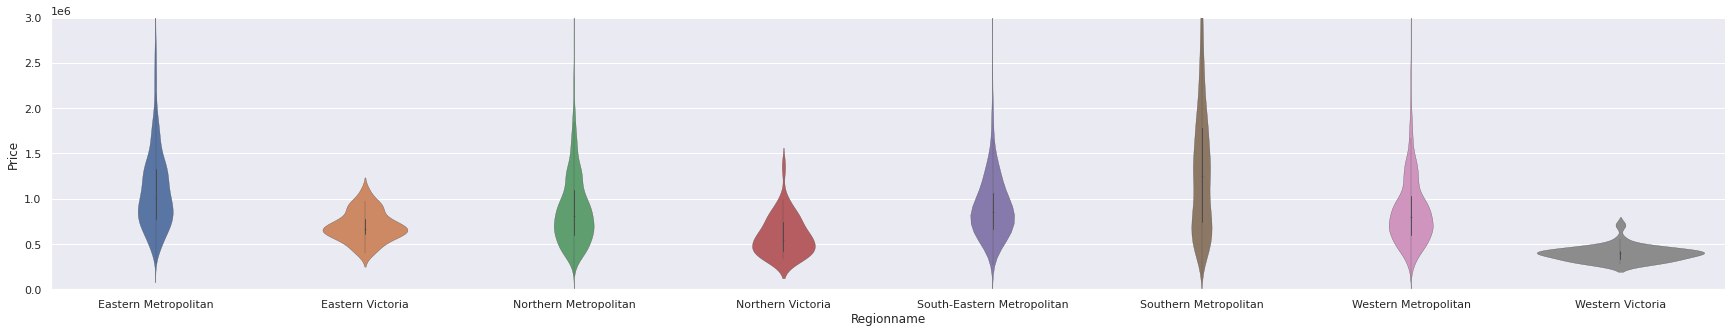

In [14]:
# fig, axs = plt.subplots(nr,nc)
sb.color_palette("pastel")
plt.figure(figsize=(30,5))
sb.violinplot(x='Regionname',y='Price',data=df,linewidth=0.3)
plt.ylim([0,3e6])
# sb.swarmplot(x='Regionname',y='Price',data = df)
sb.despine()
plt.show()

Understanding pricing within each region as a function of the # of bedrooms

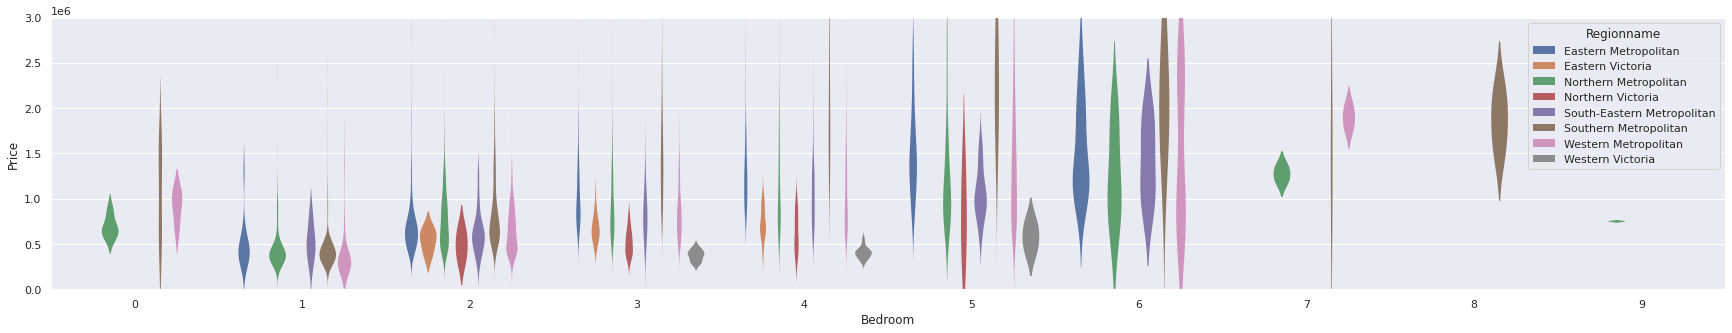

In [15]:
x = 'Bedroom' # 'Bathroom'
xl = 9 # 8

plt.figure(figsize=(30,5))
temp = df[df[x] <= xl]
sb.violinplot(x=x,y='Price',hue='Regionname',data=temp,linewidth=0.)
plt.ylim([0,3e6])
sb.despine()
plt.show()

Price density per region

(0.0, 3000000.0)

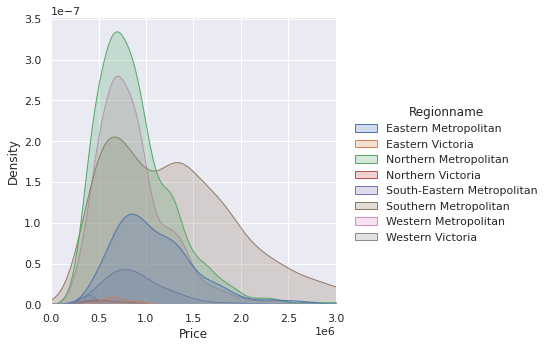

In [16]:
sb.displot(df, x='Price',hue='Regionname',kind='kde',fill=True)
plt.xlim([0,3e6])

Price range in each region per its suburb

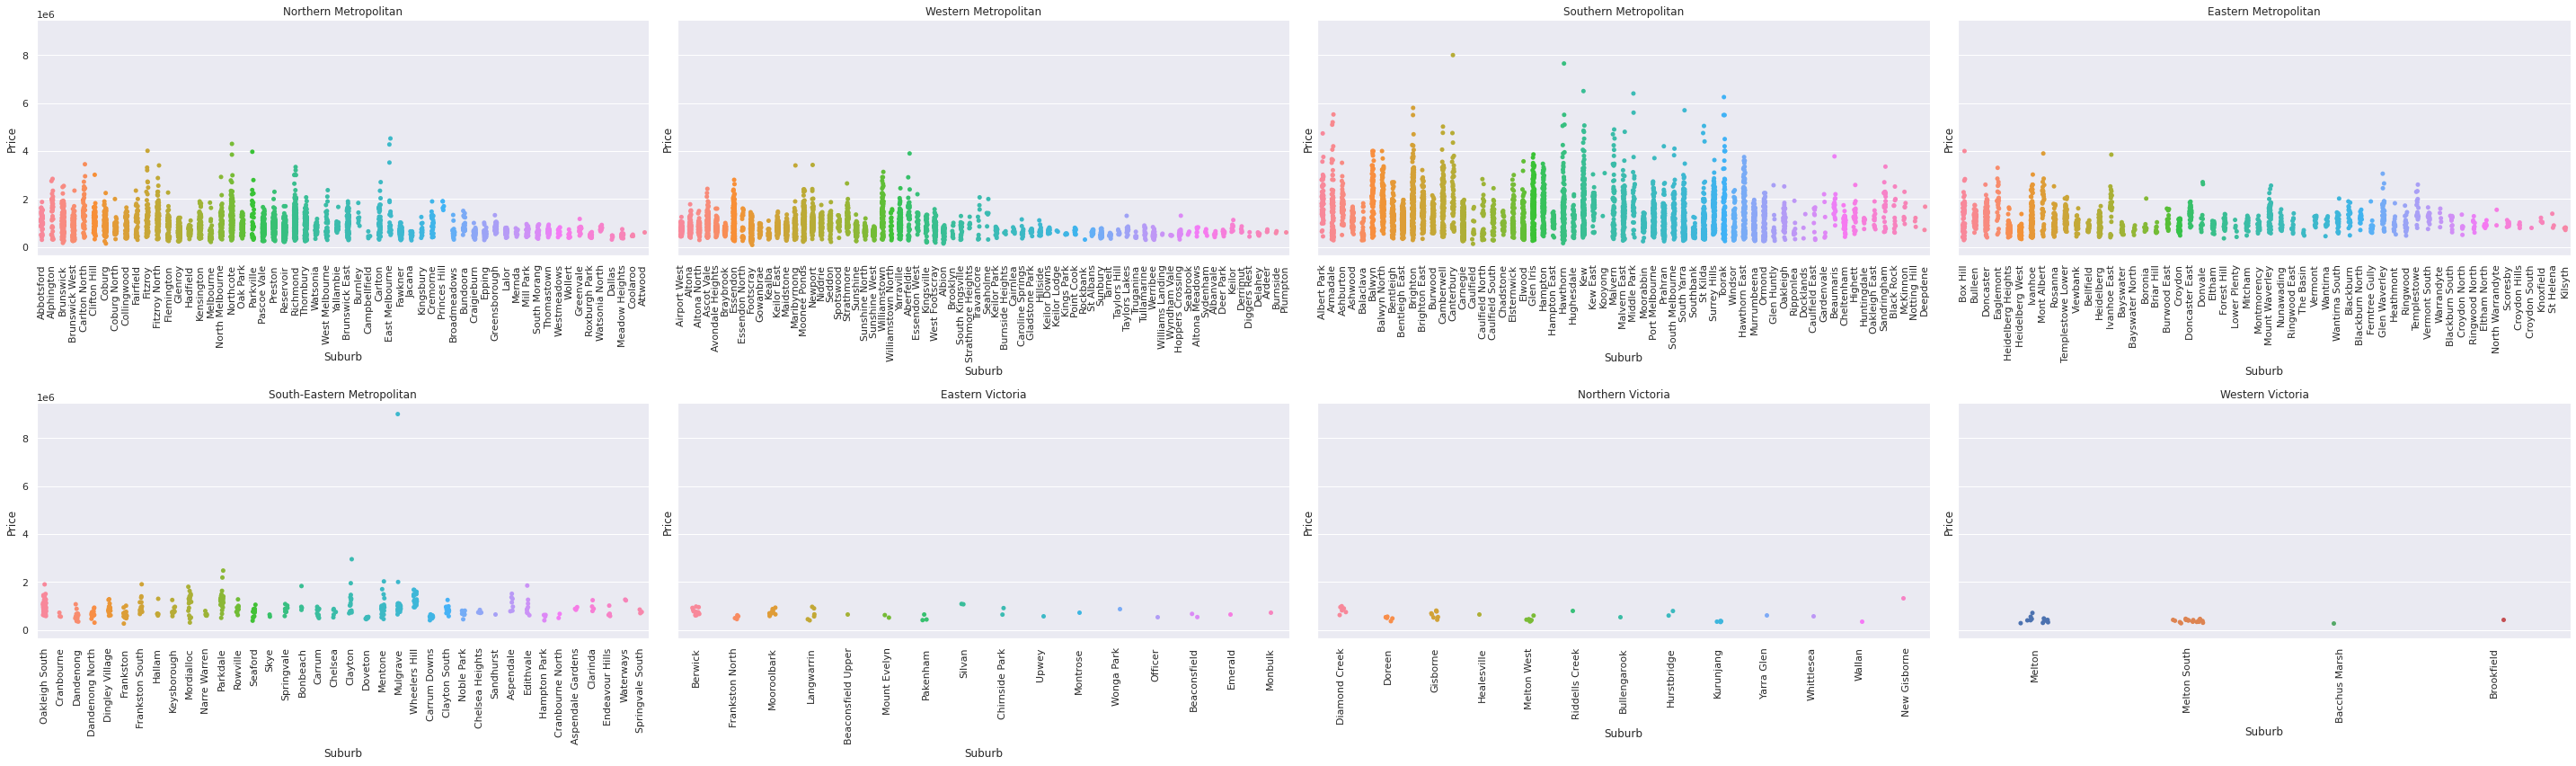

In [17]:
regnames = df_raw.Regionname.unique()
nreg = len(regnames)
nc = 4
nr = int(np.ceil(nreg/nc))

fig, axes = plt.subplots(nr,nc, figsize=(nc*10, nr*6), sharey='all')
axes_cols = axes.flatten()

for reg, ax in zip(regnames,axes_cols):
    temp = df_raw[df_raw.Regionname == reg]
    sb.stripplot(x='Suburb',y='Price',data=temp, ax=ax)
    ax.set_title(reg)
    ax.tick_params('x',labelrotation=90)

sb.despine()
fig.tight_layout()
plt.show()

Any correlations to price? Distance to CBD trends inversely, which makes sense.

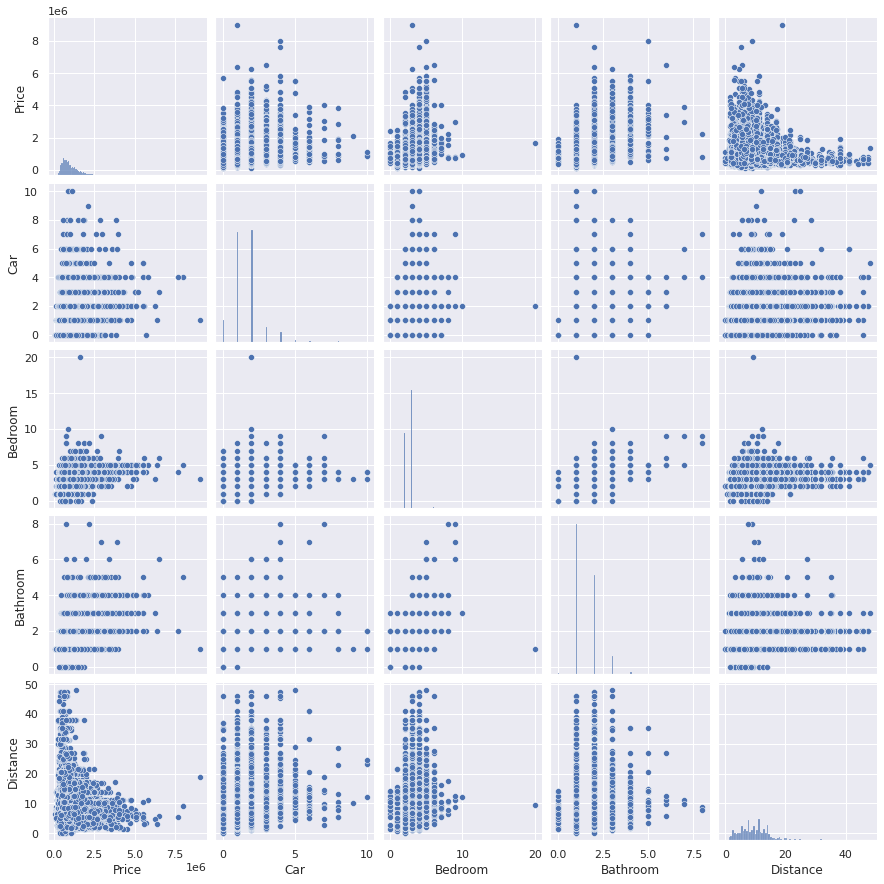

In [18]:
temp = df[['Price','Car','Bedroom','Bathroom','Distance']]
temp.head()
sb.pairplot(temp,kind='scatter',diag_kind='hist')

# **Section 4: Modeling for prediction**

In [19]:
meldata = df.copy(deep=True)

In [20]:
from sklearn.tree import DecisionTreeRegressor
y = df.Price
X = df[['Distance','Bedroom','Bathroom','Car','Propertycount']]

melmodel = DecisionTreeRegressor(random_state = 1)
melmodel.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [21]:
df.tail(5)

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Latitude,Longitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4,2,2,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3,2,2,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3,2,4,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4,1,5,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4,1,1,-37.81188,144.88449,Western Metropolitan,6543.0


<AxesSubplot:xlabel='Price'>

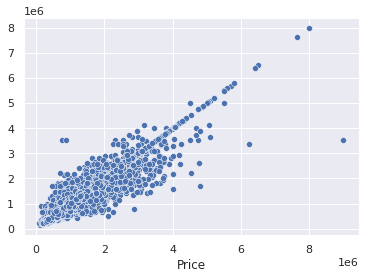

In [22]:
sb.scatterplot(x=y,y=melmodel.predict(X))